In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier 

In [3]:
# Data source path 
data_source_path = "../../DATA/"

In [4]:
# Import data
X = pd.read_csv(data_source_path+'clean_data/smart_soft_cleaning.csv', sep=";", index_col=0)
y = pd.read_csv(data_source_path+'output_train.csv', sep=";", index_col=0)

not_null_indexes = X['question'].notnull()
X = X[not_null_indexes]
y = y[not_null_indexes]

features = X.columns
targets = y['intention'].unique()

In [5]:
X[y['intention'] == 1] 

,question
137,quels être les signes surdosage en medicament
179,comparaison medicament medicament
391,medicament être placebo
845,qu être que calcibronate
1882,quelle forme galénique traitement anti maladie...
1982,comparaison medicament et medicament
2009,quels être les avantages medicament
2747,pourquoi les génériques medicament être retiré...
2780,quel être aspect comprimé aimantine
2894,réaction medicament mois après


In [6]:
targets

array([28, 31, 44, 48, 22, 23, 42, 32, 26,  0, 34, 14,  7, 37,  4, 11, 24,
       40, 46, 30,  8, 38, 13, 21, 15, 27,  5, 33,  6, 25,  1, 50, 43, 45,
       39, 29, 19, 12, 47, 20,  9, 10, 41, 49, 18, 17,  2, 36, 16, 35,  3])

In [7]:
vectorizer = TfidfVectorizer()
X_vectors = vectorizer.fit_transform(X['question'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y['intention'], random_state = 42)

## ExtraTree classification

In [11]:
clf = GradientBoostingClassifier(n_estimators = 200)
#clf = GaussianProcessClassifier(QAmulti_class = “one_vs_one”)
clf.fit(X = X_train, y=y_train)
clf.score(X = X_test, y=y_test)

0.560039860488291

In [9]:
y_predict = xtree.predict(X = X_test)

In [10]:
y_test.values

array([37, 44, 44, ..., 23,  8, 28])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


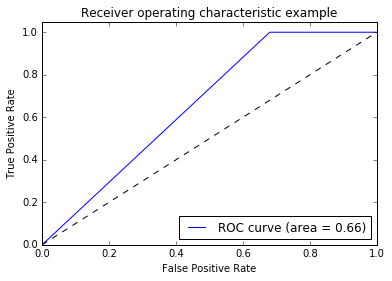

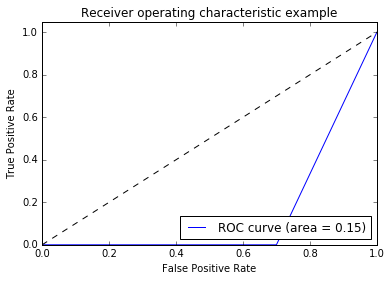

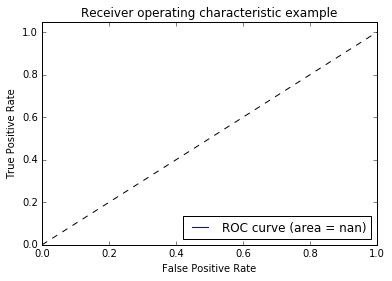

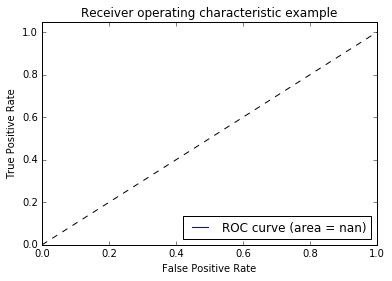

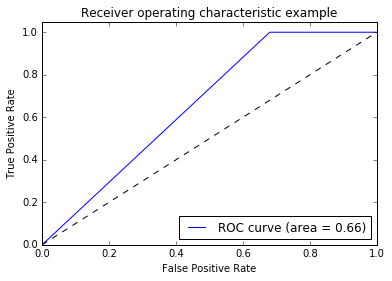

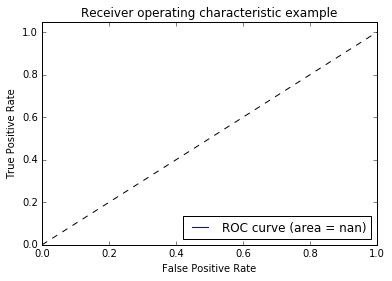

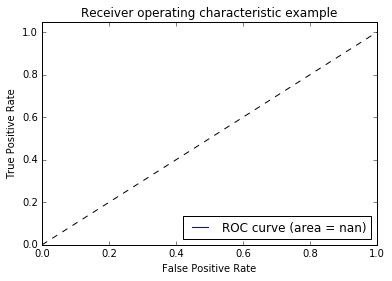

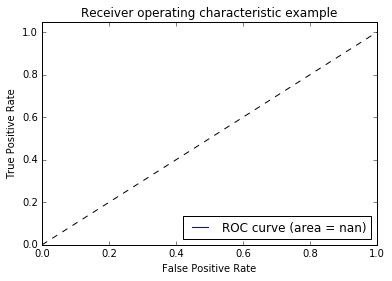

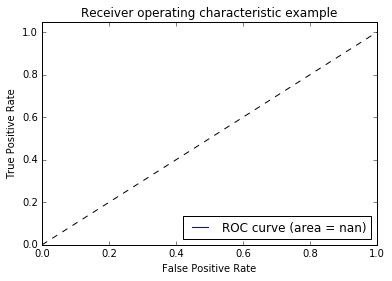

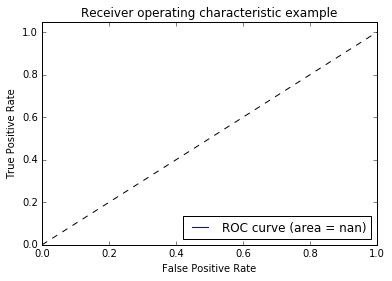

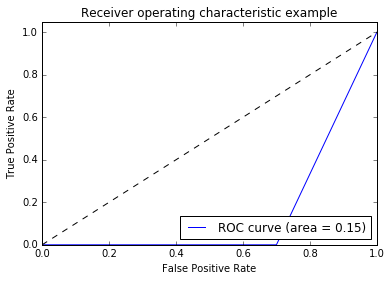

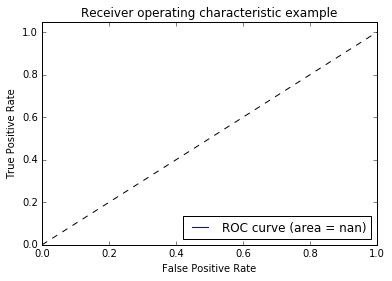

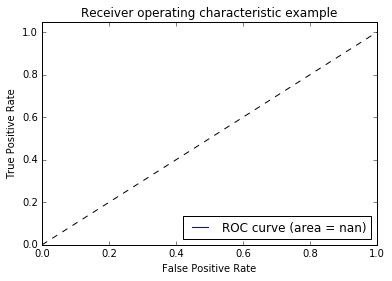

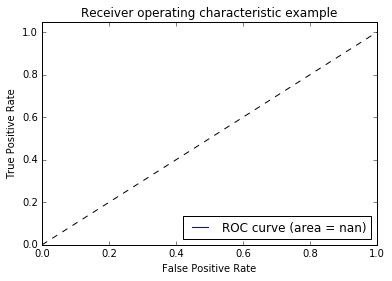

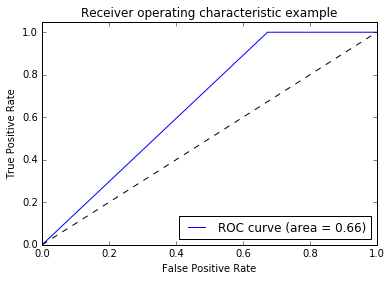

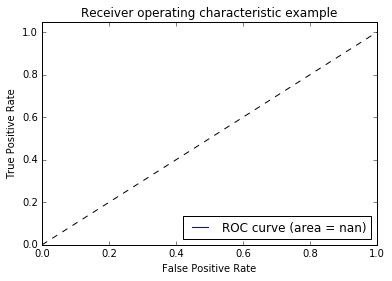

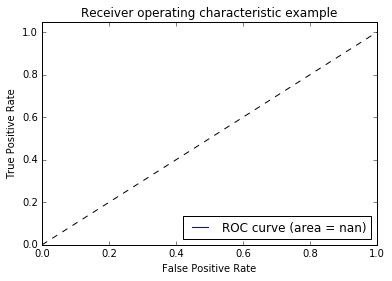

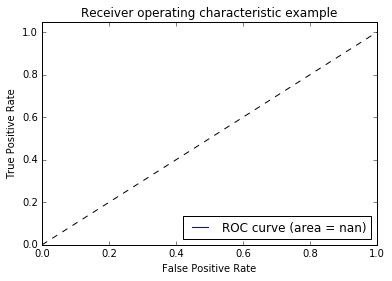

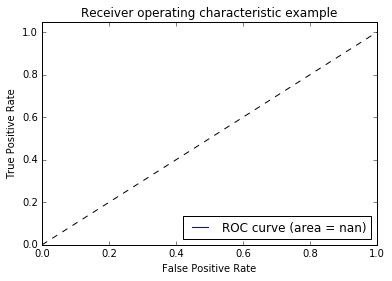

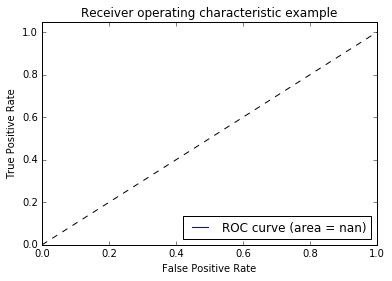

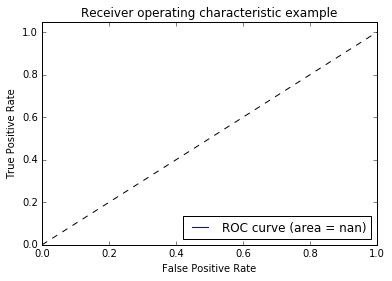

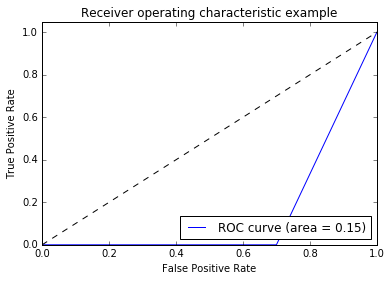

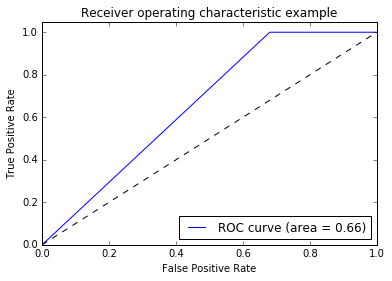

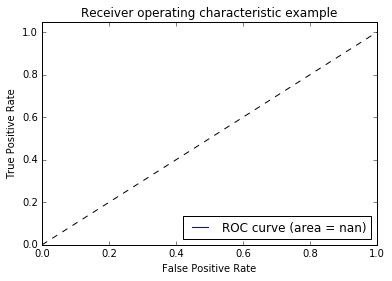

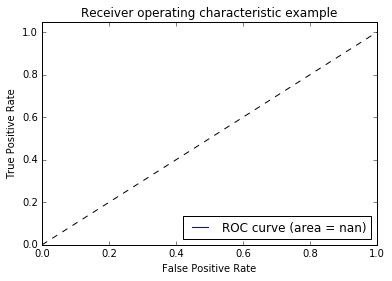

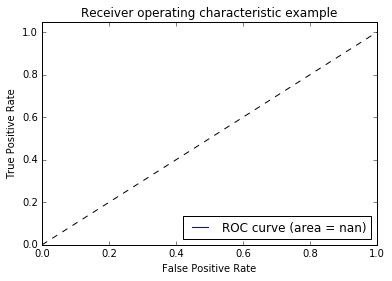

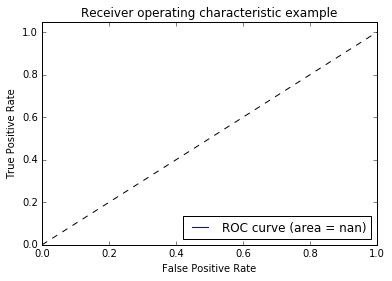

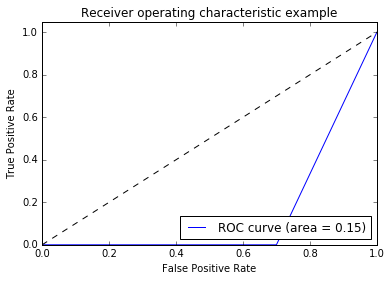

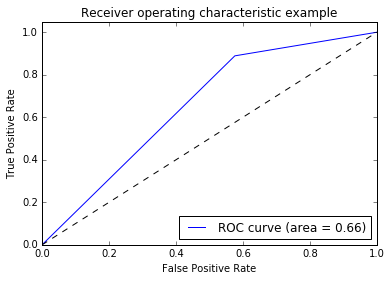

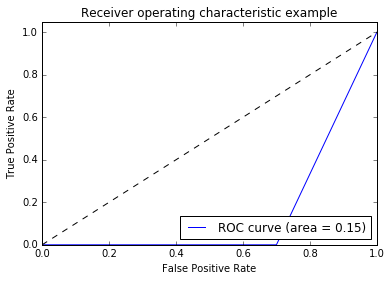

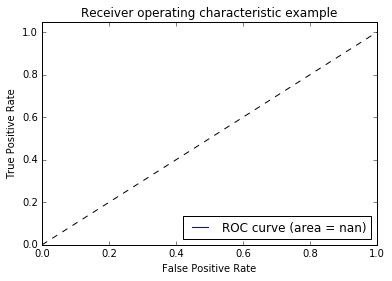

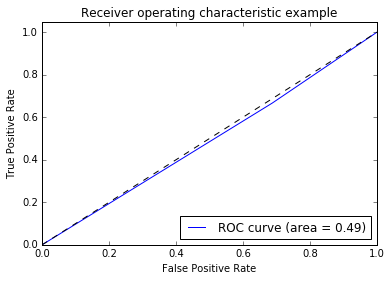

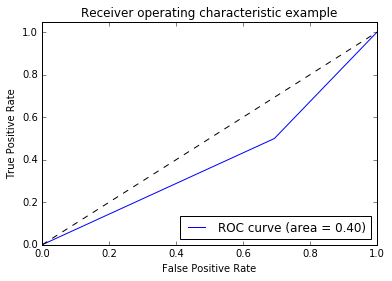

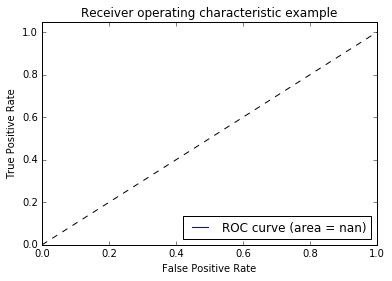

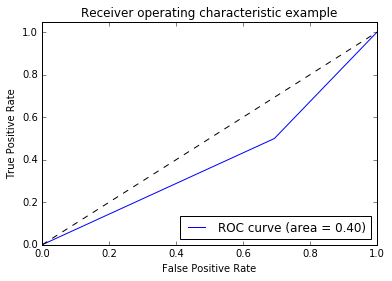

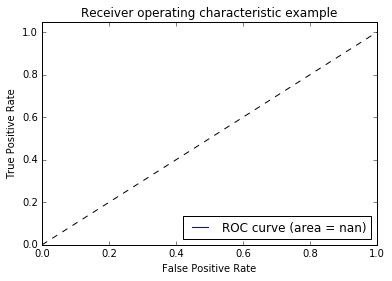

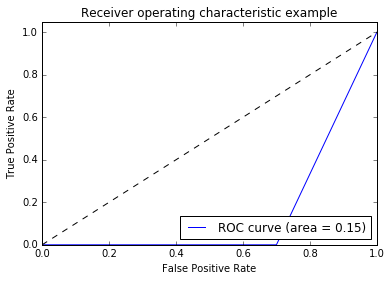

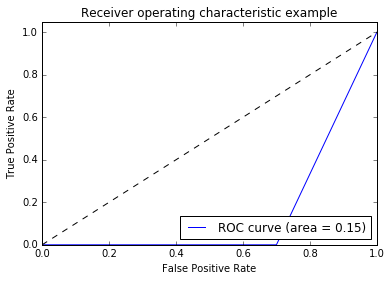

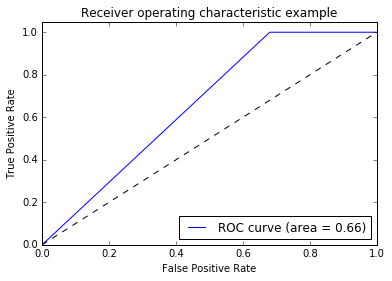

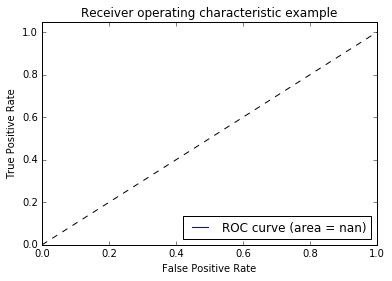

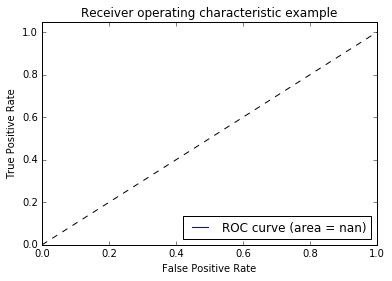

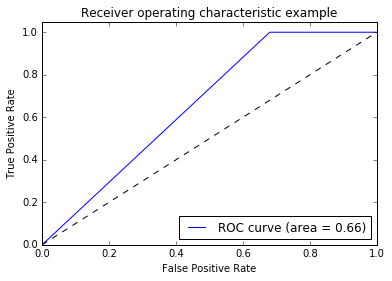

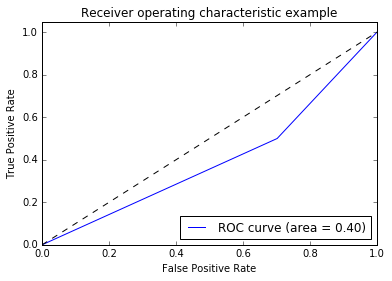

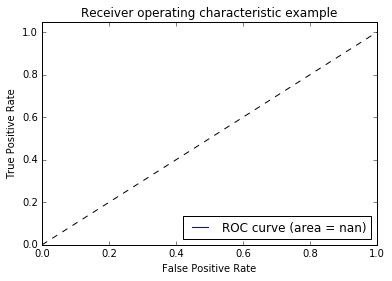

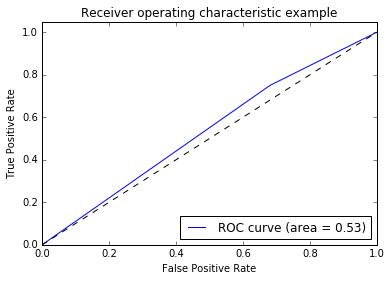

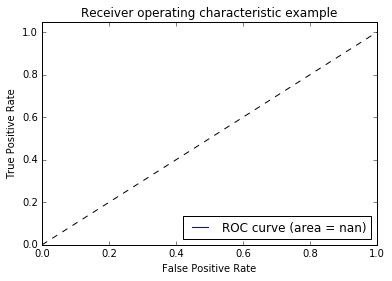

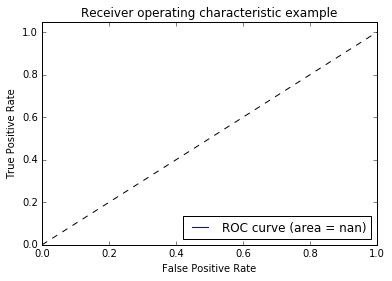

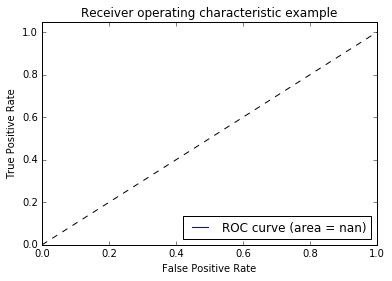

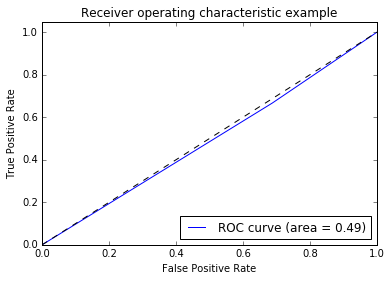

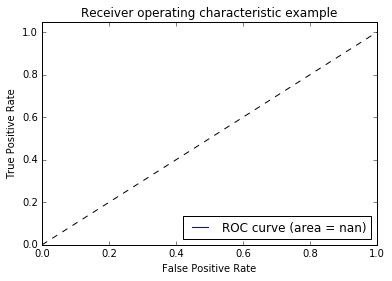

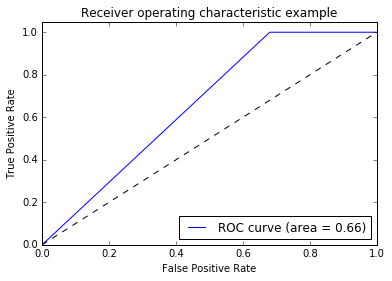

In [11]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(targets)):
    y_test_roc = []
    y_score = []
    for j in range(len(targets)):
        y_test_roc.append([(0,1)[y_test.values[j]==i]])
        y_score.append([(0,1)[y_test.values[j]==y_predict[j]]])
    fpr[i], tpr[i], _ = roc_curve(y_test_roc, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(len(targets)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [12]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'false_positive_rate' is not defined